#**Implementing Ideal low pass and Ideal high pass filter in frequency Domain**

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

array([[151, 154, 157, ..., 255, 255, 255],
       [154, 151, 156, ..., 255, 255, 255],
       [154, 154, 156, ..., 255, 255, 255],
       ...,
       [164, 167, 168, ..., 255, 255, 255],
       [164, 167, 168, ..., 255, 255, 255],
       [167, 167, 168, ..., 255, 255, 255]], dtype=uint8)
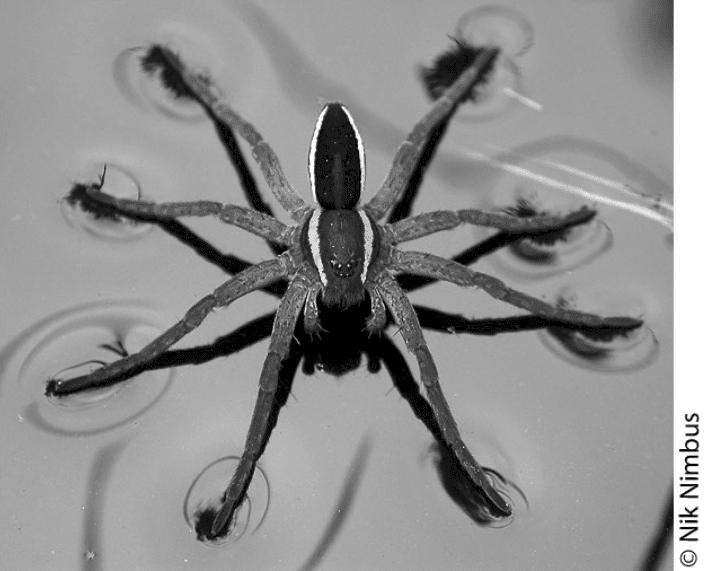

In [27]:
image = cv2.imread('/content/spider.png',0)
image

In [28]:
# Perform Fourier transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
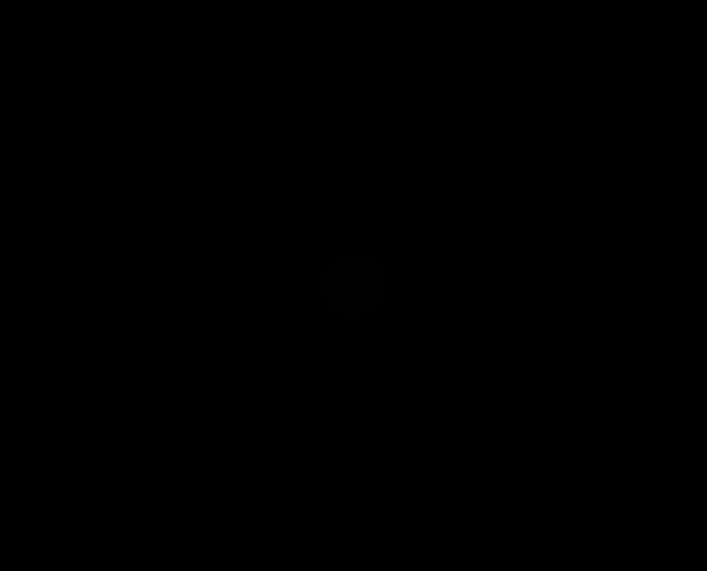

In [29]:
# Create ideal low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
d = 30  # Cutoff frequency
low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), d, (1), -1)

In [36]:
# Apply the low-pass filter
f_shift_low_pass = f_shift * low_pass_mask

In [37]:
# Perform inverse Fourier transform to get the image back
f_ishift_low_pass = np.fft.ifftshift(f_shift_low_pass)
img_back_low_pass = np.fft.ifft2(f_ishift_low_pass)
img_back_low_pass = np.abs(img_back_low_pass)

In [38]:
# Create ideal high-pass filter
high_pass_mask = np.ones((rows, cols), np.uint8) - low_pass_mask

In [39]:
# Apply the high-pass filter
f_shift_high_pass = f_shift * high_pass_mask

In [40]:
# Perform inverse Fourier transform to get the image back
f_ishift_high_pass = np.fft.ifftshift(f_shift_high_pass)
img_back_high_pass = np.fft.ifft2(f_ishift_high_pass)
img_back_high_pass = np.abs(img_back_high_pass)

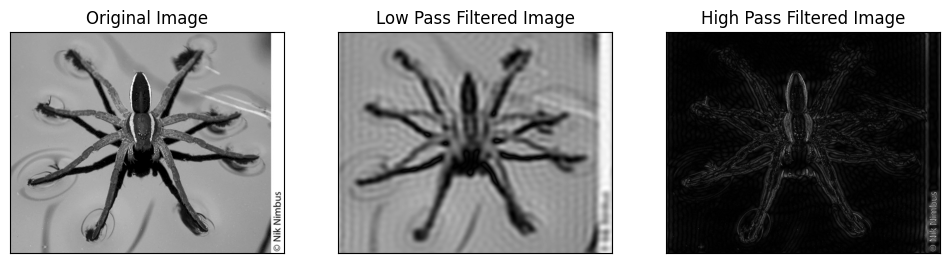

In [41]:
# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back_low_pass, cmap='gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back_high_pass, cmap='gray')
plt.title('High Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()